# Determining the tone of the text of reviews for films from IMDb (Internet Movie Database)

## IMDb movie review data set

The [IMDb movie review dataset](https://ai.stanford.edu/~amaas/data/sentiment/) was created for text sentiment detection tasks. The set includes movie reviews from the [IMDb](https://www.imdb.com) website. Reviews are only clearly positive (score >= 7) or negative (score <= 4), neutral reviews were not included in the dataset.

Data set size 50k reviews:
- Training dataset - 25k reviews
- Testing dataset - 25k reviews

The number of positive and negative reviews is the same.

Data set markup:
- 0 - feedback is negative
- 1 - positive feedback

From a machine learning perspective, this is a binary classification problem.

The dataset is described in: [Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)](https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf).

In [44]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [45]:
max_words=10000

In [46]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

## Preparing data for training

In [47]:
maxlen = 200

In [48]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [49]:
x_train[5002]

array([   1,  103,   51,   13,  197,   16,    6, 4796,  239,    7,  107,
        555,   11,  132,   39, 8921, 1872,  138,   16, 4093, 1768, 2959,
         34, 1620,    2,   11,    4,  755,   12,   43,  286,    4,  172,
        209,    2,    5, 5938,   17, 1000,   34, 1768,  279,   29, 3892,
         89,  338,    4,  114,   16, 1240, 1747,  103, 3844, 3819,    8,
        169, 2875,  112, 7062,   34,  160,  132,   29,  100,   24,  535,
        101,  250,    8,  858,   15,  196,   19,   57, 3154,   39,   90,
          5,   24,  169, 3533,   18,    6,  910,   20,   14, 1367, 3939,
       1101,  935,    4,  545, 1744,  173,   54, 1240, 2875,    2,   56,
        209,  112, 1021,   55,  835,  179,   35, 2384,    8,  529, 1663,
       1793,    8, 1066,    7,   61,  223,  637, 1231,   19,    4,   86,
         31,    5,  353,    8,  859,   13,  126,  219,    4,  755,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [50]:
y_train[3]

1

## SimpleRNN Model

In [51]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Training NN


In [53]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/25
176/176 [==============================] - 5s 22ms/step - loss: 0.6928 - accuracy: 0.5122 - val_loss: 0.6922 - val_accuracy: 0.5076
Epoch 2/25
176/176 [==============================] - 4s 21ms/step - loss: 0.6852 - accuracy: 0.5532 - val_loss: 0.6929 - val_accuracy: 0.5096
Epoch 3/25
176/176 [==============================] - 4s 20ms/step - loss: 0.6703 - accuracy: 0.5903 - val_loss: 0.6953 - val_accuracy: 0.5112
Epoch 4/25
176/176 [==============================] - 4s 22ms/step - loss: 0.6502 - accuracy: 0.6256 - val_loss: 0.7103 - val_accuracy: 0.5028
Epoch 5/25
176/176 [==============================] - 4s 24ms/step - loss: 0.6251 - accuracy: 0.6553 - val_loss: 0.7219 - val_accuracy: 0.4948
Epoch 6/25
176/176 [==============================] - 4s 21ms/step - loss: 0.5979 - accuracy: 0.6885 - val_loss: 0.7443 - val_accuracy: 0.5092
Epoch 7/25
176/176 [==============================] - 4s 21ms/step - loss: 0.5727 - accuracy: 0.7103 - val_loss: 0.7750 - val_accuracy: 0.5104

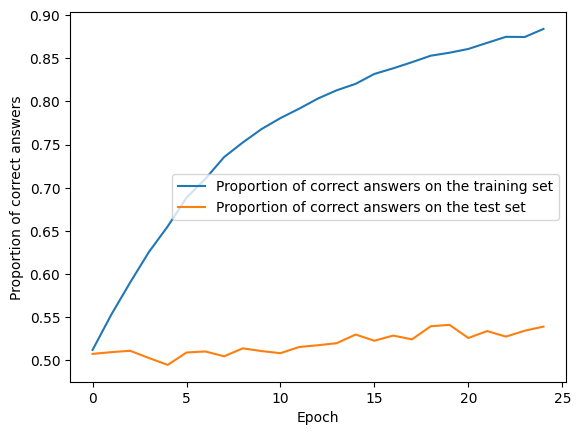

In [54]:
plt.plot(history.history['accuracy'], 
         label='Proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='Proportion of correct answers on the test set')
plt.xlabel('Epoch')
plt.ylabel('Proportion of correct answers')
plt.legend()
plt.show()

## Testing model on test data set

In [55]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 4s 5ms/step - loss: 1.1470 - accuracy: 0.5348


In [56]:
print("Proportion of correct answerts on test data set, in percentage: ", round(scores[1] * 100, 4))

Proportion of correct answerts on test data set, in percentage:  53.484


## Improvement of Neural Network by one hot encoding


### One hot encoding function

In [57]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [58]:
x_train = vectorize_sequences(x_train, max_words)
x_test = vectorize_sequences(x_test, max_words)

In [59]:
x_train[0][:50]

array([0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])

### New Neural Network

In [60]:
model_one_hot = Sequential()
model_one_hot.add(Dense(128, activation='relu', input_shape=(max_words,)))
model_one_hot.add(Dense(64, activation='relu'))
model_one_hot.add(Dense(1, activation='sigmoid'))

In [61]:
model_one_hot.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [62]:
history = model_one_hot.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 3s 15ms/step - loss: 0.3461 - accuracy: 0.8480 - val_loss: 0.2881 - val_accuracy: 0.8772
Epoch 2/10
176/176 [==============================] - 2s 13ms/step - loss: 0.1801 - accuracy: 0.9298 - val_loss: 0.3277 - val_accuracy: 0.8748
Epoch 3/10
176/176 [==============================] - 2s 13ms/step - loss: 0.0998 - accuracy: 0.9664 - val_loss: 0.4020 - val_accuracy: 0.8660
Epoch 4/10
176/176 [==============================] - 2s 12ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.5204 - val_accuracy: 0.8720
Epoch 5/10
176/176 [==============================] - 2s 13ms/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.6486 - val_accuracy: 0.8724
Epoch 6/10
176/176 [==============================] - 2s 13ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7681 - val_accuracy: 0.8688
Epoch 7/10
176/176 [==============================] - 2s 13ms/step - loss: 3.3312e-04 - accuracy: 1.0000 - val_loss: 0.8185 - val_accuracy: 0.

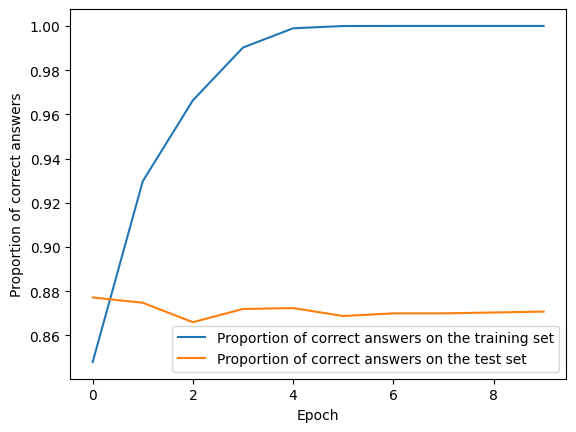

In [63]:
plt.plot(history.history['accuracy'], 
         label='Proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='Proportion of correct answers on the test set')
plt.xlabel('Epoch')
plt.ylabel('Proportion of correct answers')
plt.legend()
plt.show()

### Checking network performance on a test data set

In [64]:
scores = model_one_hot.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 2s 3ms/step - loss: 0.9756 - accuracy: 0.8500


In [65]:
print("Proportion of correct answerts on test data set with one hot encoding, in percentage: ", round(scores[1] * 100, 4))

Proportion of correct answerts on test data set with one hot encoding, in percentage:  85.0


### LSTM Neural Network

In [66]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_words, 8, input_length=maxlen))
model_LSTM.add(LSTM(32, recurrent_dropout = 0.2))
model_LSTM.add(Dense(1, activation='sigmoid'))

In [67]:
model_LSTM.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [68]:
history = model_LSTM.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15


ValueError: in user code:

    File "c:\Users\Daniyal.LAPTOP-KA802S25\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Daniyal.LAPTOP-KA802S25\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Daniyal.LAPTOP-KA802S25\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Daniyal.LAPTOP-KA802S25\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Daniyal.LAPTOP-KA802S25\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Daniyal.LAPTOP-KA802S25\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 200), found shape=(None, 10000)


In [ ]:
plt.plot(history.history['accuracy'], 
         label='Proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='Proportion of correct answers on the test set')
plt.xlabel('Epoch')
plt.ylabel('Proportion of correct answers')
plt.legend()
plt.show()